In [1]:
import sys
sys.path.append('../tools/')
from functions import create_complete_datasets
from scipy.io import loadmat
import numpy as np

from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

In [2]:
file = "../data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

In [3]:
pca = PCA(n_components=10)
train_set = pca.fit_transform(train_set)
test_set = pca.transform(test_set)

In [4]:
ss = StandardScaler()
train_set = ss.fit_transform(train_set)
test_set = ss.transform(test_set)

In [5]:
params = [
    {'hidden_layer_sizes': (32)},
    {'hidden_layer_sizes': (64)},
    {'hidden_layer_sizes': (32, 16)},
    {'hidden_layer_sizes': (64, 32)},
    {'hidden_layer_sizes': (32, 16, 8)}
]

labels = [
    "(32)",
    "(64)",
    "(32, 16)",
    "(64, 32)",
    "(32, 16, 8)",
]

plot_args = [
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"}
]


learning on MNIST digit dataset
training: (32)


c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.925450
Training set loss: 0.238658
training: (64)


c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.938700
Training set loss: 0.191761
training: (32, 16)


c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.931883
Training set loss: 0.213586
training: (64, 32)


c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.954233
Training set loss: 0.141960
training: (32, 16, 8)
Training set score: 0.931583
Training set loss: 0.219085


c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


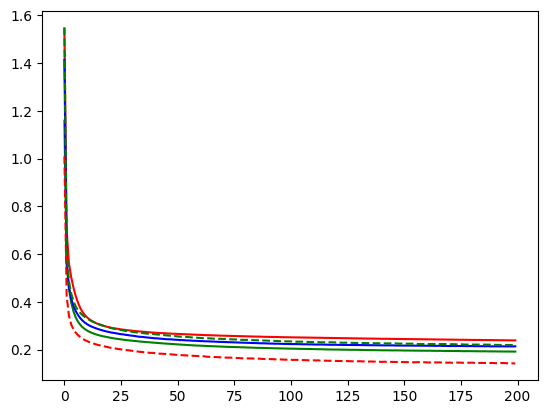

In [6]:
mlps = []
print('\nlearning on MNIST digit dataset')
for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=42, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        mlp.fit(train_set, train_targets)

        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(train_set, train_targets))
        print("Training set loss: %f" % mlp.loss_)
for mlp, label, args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_, label=label, **args)
    
plt.show()

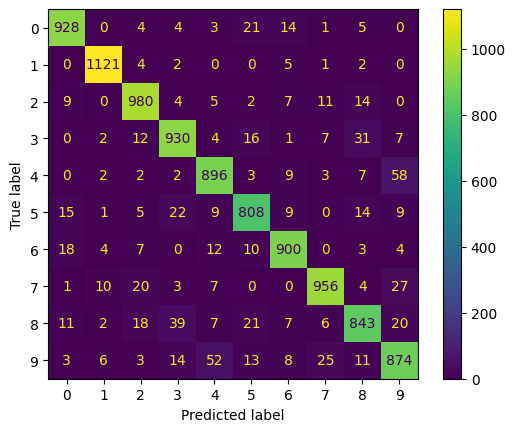

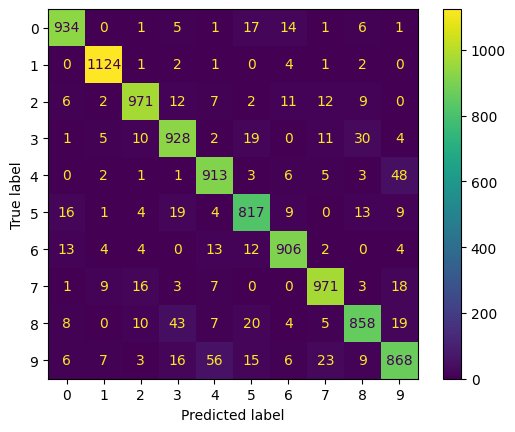

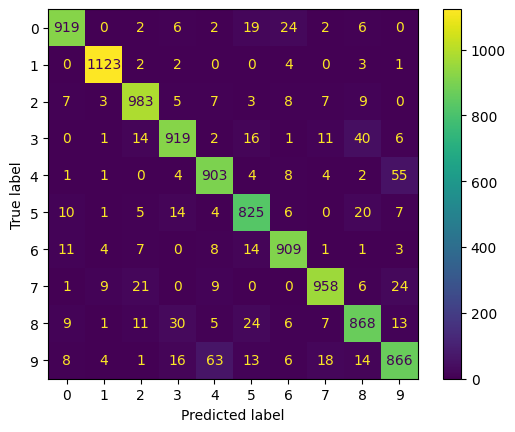

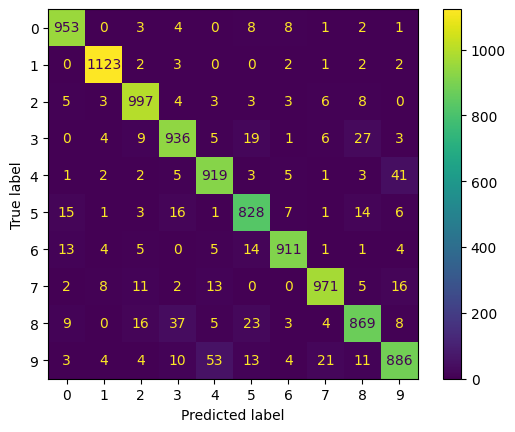

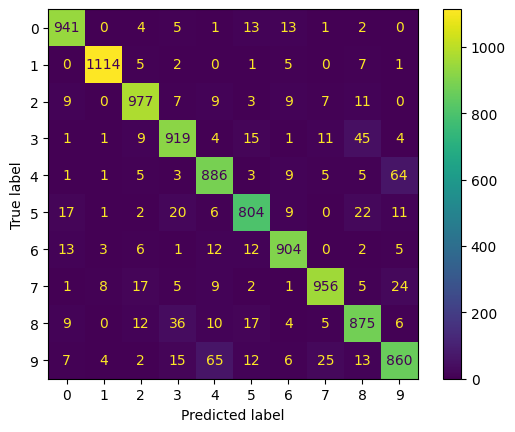

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
for mlp in mlps:
    cm = confusion_matrix(test_targets, mlp.predict(test_set))
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()
